# Flat terrain

***MCTS:***
```bash 
>> python3 examples/design_search/design_search.py -a mcts -j8 -i5000 -d20 --log_dir logs_mcts FlatTerrainTask data/designs/grammar_apr30.dot
```

***Visualization:***
```bash 
python3 examples/design_search/viewer.py FlatTerrainTask data/designs/grammar_apr30.dot -j8 0, 12, 7, 1, 12, 3, 10, 1, 3, 1, 12, 12, 1, 3, 10, 2, 16, 8, 1, 3, 12, 4, 1, 3, 2, 12, 18, 9, 18, 8, 5, 5, 1, 12, 6, 3 -o
```

**Ours mcts:**

```bash
python3 examples/design_search/viewer.py FlatTerrainTask data/designs/grammar_apr30.dot -j8 0, 1, 6, 2, 4, 2, 7, 15, 18, 12, 16, 8, 8, 4, 14, 5, 8, 5, 9 -o
```

20 as maximum depth (?)

In [ ]:
import pandas as pd
import numpy as np
import os 
import ast
import matplotlib.pyplot as plt 
from scipy.signal import lfilter

path = 'logs_mcts/'
# mcts = os.listdir(path)
df = pd.read_csv(path+'mcts_20221022_210951.csv') # longer

print(df.shape)
idx = 0

fig, (ax1) = plt.subplots(1,1, figsize = (10,4))

n = 15  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,df.result)

ax1.plot(df.result, '*')
ax1.plot(yy, linewidth=2, linestyle="-", c="b")  # smooth by filter
ax1.set_title('MCTS depth 20')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Reward')
fig.tight_layout()
fig.savefig('mcts.png')

df = df.sort_values(by=['result'], ascending=False).reset_index()

rule = df.iloc[idx].rule_seq
seed = df.iloc[idx].opt_seed

print('python3 examples/design_search/viewer.py FlatTerrainTask data/designs/grammar_apr30.dot ' 
      f'-j8 {rule[1:-1]} -o --opt_seed {seed}')


In [ ]:
df

In [3]:
df

,index,iteration,rule_seq,opt_seed,result
0,10,10,"[0, 2, 4, 1, 16, 16, 4, 17, 12, 7, 5, 10, 6, 9...",2253886896,4.468262
1,48,48,"[0, 13, 7, 13, 2, 1, 16, 8, 13, 3, 1, 12, 6, 4...",1757887268,4.421254
2,53,53,"[0, 2, 12, 4, 1, 13, 15, 9, 8, 10, 17, 2, 17, ...",786016101,4.211591
3,40,40,"[0, 2, 10, 4, 1, 16, 10, 17, 3, 10, 6, 9, 4, 5...",1608507388,4.107208
4,52,52,"[0, 13, 13, 1, 7, 10, 6, 2, 19, 2, 18, 4, 14, ...",686991620,4.065062
...,...,...,...,...,...
56,9,9,"[0, 6, 3, 7]",3387364177,2.906035
57,36,36,"[0, 3, 10, 6, 7]",2813925197,2.906035
58,34,34,"[0, 10, 6, 3, 7]",2563475254,2.906035
59,39,39,"[0, 6, 11, 3, 7]",4085512275,2.906035


In [ ]:
rules_seq = []
rules_len = []
for i in range(df.shape[0]):
    rule = ast.literal_eval(df.iloc[i].rule_seq)
    rules_len.append(len(rule))
    rules_seq.append(rule) 

    
print(np.mean(rules_len))
print(np.std(rules_len))

In [ ]:
data = {}
for i in range(20):
    data[i] = []
    
for r in rules_seq:
    for i in range(20):
        if(len(r)>i):
            data[r[i]].append(i)

In [ ]:
fig, ax = plt.subplots(20, 1, figsize = (5,8))
for i in range(20):
    ax[i].hist(data[i],bins=50)
    ax[i].set_yticks([])
    ax[i].set_ylabel(f'piece #{i}', rotation=0, labelpad=25)

ax[-1].set_xlabel(f'Rules');
ax[0].set_title('histograms piece # vs rules')
fig.savefig('distributions.png', bbox_inches = 'tight')

(5000, 4)
python3 examples/design_search/viewer.py FlatTerrainTask data/designs/grammar_apr30.dot -j8 0, 1, 6, 2, 4, 2, 7, 15, 18, 16, 12, 8, 9, 9, 5, 5 -o --opt_seed 1205761762


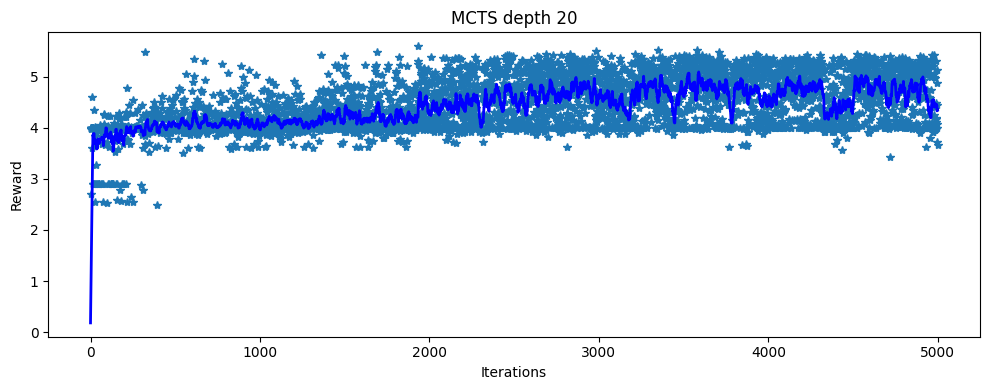

In [1]:
import pandas as pd
import numpy as np
import os 
import ast
import matplotlib.pyplot as plt 
from scipy.signal import lfilter

path = 'logs_mcts/'
mcts = os.listdir(path)
df = pd.read_csv(path+mcts[3]) # longer

print(df.shape)
idx = 50

fig, (ax1) = plt.subplots(1,1, figsize = (10,4))

n = 15  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,df.result)

ax1.plot(df.result, '*')
ax1.plot(yy, linewidth=2, linestyle="-", c="b")  # smooth by filter
ax1.set_title('MCTS depth 20')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Reward')
fig.tight_layout()
fig.savefig('mcts.png')

df = df.sort_values(by=['result'], ascending=False).reset_index()

rule = df.iloc[idx].rule_seq
seed = df.iloc[idx].opt_seed

print('python3 examples/design_search/viewer.py FlatTerrainTask data/designs/grammar_apr30.dot ' 
      f'-j8 {rule[1:-1]} -o --opt_seed {seed}')


In [2]:
rules_seq = []
rules_len = []
for i in range(df.shape[0]):
    rule = ast.literal_eval(df.iloc[i].rule_seq)
    rules_len.append(len(rule))
    rules_seq.append(rule) 

    
print(np.mean(rules_len))
print(np.std(rules_len))

17.202
2.3838615731623345


In [4]:
data = {}
for i in range(20):
    data[i] = []
    
for r in rules_seq:
    for i in range(20):
        if(len(r)>i):
            data[r[i]].append(i)

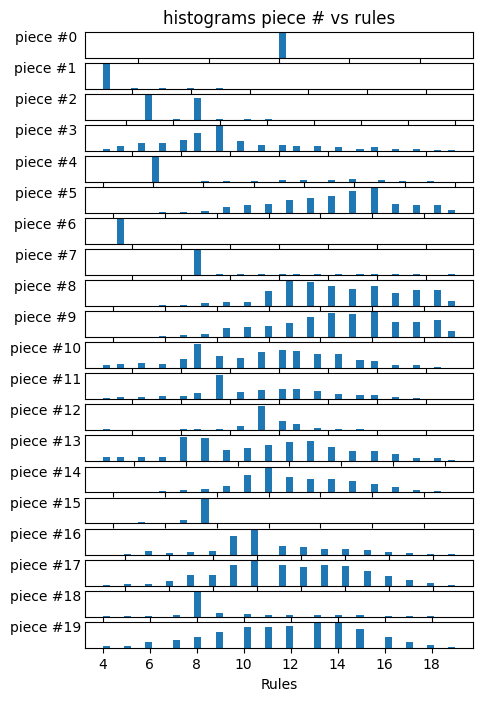

In [6]:
fig, ax = plt.subplots(20, 1, figsize = (5,8))
for i in range(20):
    ax[i].hist(data[i],bins=50)
    ax[i].set_yticks([])
    ax[i].set_ylabel(f'piece #{i}', rotation=0, labelpad=25)

ax[-1].set_xlabel(f'Rules');
ax[0].set_title('histograms piece # vs rules')
fig.savefig('distributions.png', bbox_inches = 'tight')